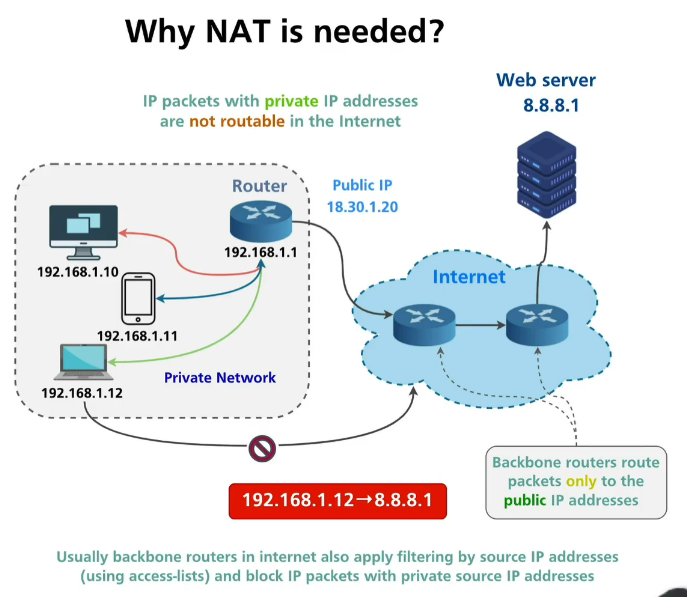

Watch this before proceeding: NAT - SNAT, DNAT, PAT & Port Forwarding  https://www.youtube.com/watch?v=wg8Hosr20yw

In the previous sections, we have discussed the difference between private & public addresses;
Private addresses could be re-used in multiple places in internet, but the packets having private source/destination IP address are NOT routed in the internet backbone. This is because BGP simply
removes any private IP prefixes from its database (??? via BGP Prefix List) and backbone routers do NOT insert routes having private IP address blocks. 

But our end hosts (e.g. our phones, laptops etc) have a private IP address assigned to them.
And our end hosts are capable of accessing internet thanks to Network Address Translation tables
in the default gateway router.

In the above diagram, we have a private network 192.168.1.0/24.
Imagine we want to send a packet from host 192.168.1.12 to 8.8.8.1.
Router with LAN interface 192.168.1.1 is the default gateway for all hosts in the private network.
Note that the default gateway as a WAN interface with public IP address 18.30.1.20.
In the internet cloud, we have several backbone routers in an ISP network.

When the packet is received at the default gateway router, it forwards
the packet to its default route's interface (i.e. 18.30.1.20) to ISP router. 
ISP router checks if the source/destination address are from the Access List:

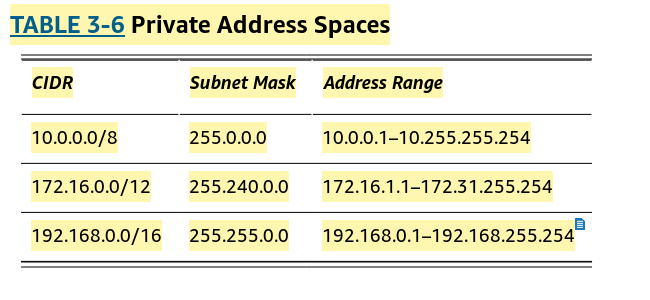

## NAT Types (Lecture 159 of Bogdan)

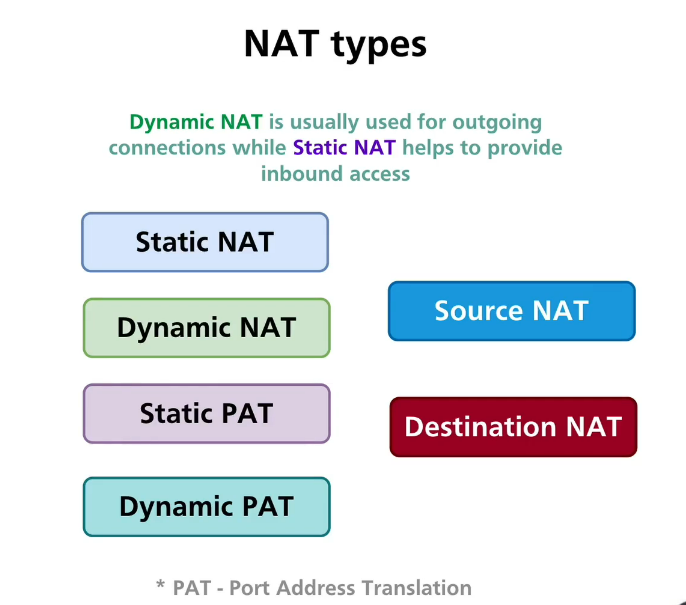

## How does NAT work? (Lecture 160 of Bogdan)

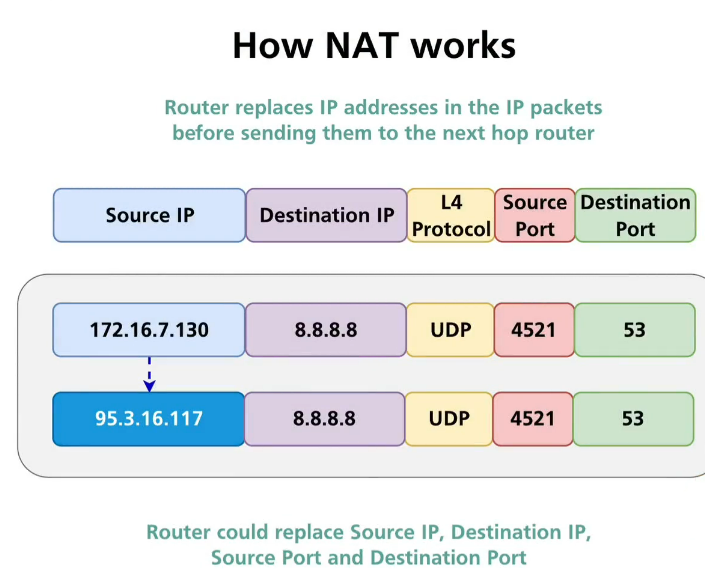

We learned earlier that router could modify TTL in the IP header and re-calculate
IP checksum. But now router can also modify the source & destination address in the IP header:

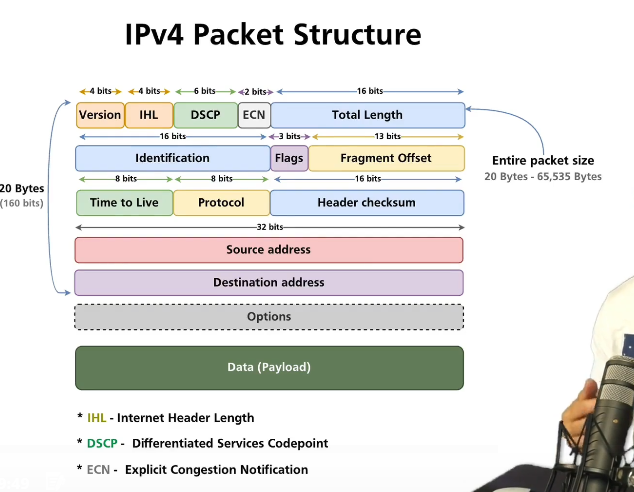

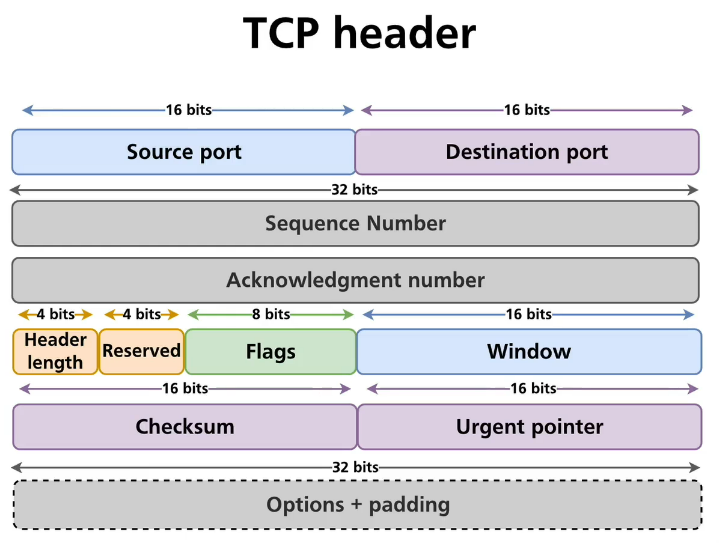

So, if PAT is enabled, a router also operates on Transport Layer as well.

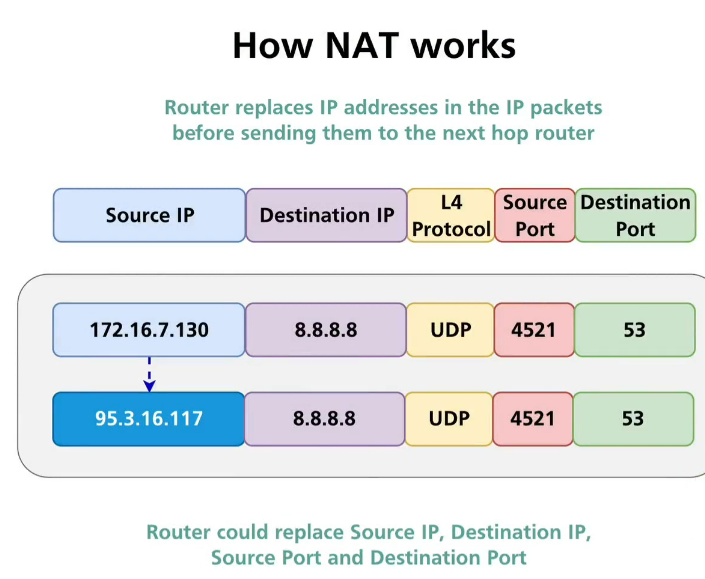

In the above diagram, there is a simplified structure of an outgoing frame from 172.16.7.130 to 8.8.8.8.
Note that NAT is enabled in the default gateway router R1. When R1 decides about the route via the routing table lookup, it determines that it needs to forward the packet to its Gi0/1 interface with public IP 95.3.16.117. It then modifies the IP packet's source IP from 172.16.7.130 (private) to 95.3.16.117 (public) while also reducing TTL and re-calculating the IP header checksum. 

When the server 8.8.8.8 sends a response packet back to 95.3.16.117 (public) of R1, then R1 will replace the destination IP from 95.3.16.117 (public) to 172.16.7.130 (private).

## Static one-to-one NAT for incoming packets (Lecture 161 of Bogdan)

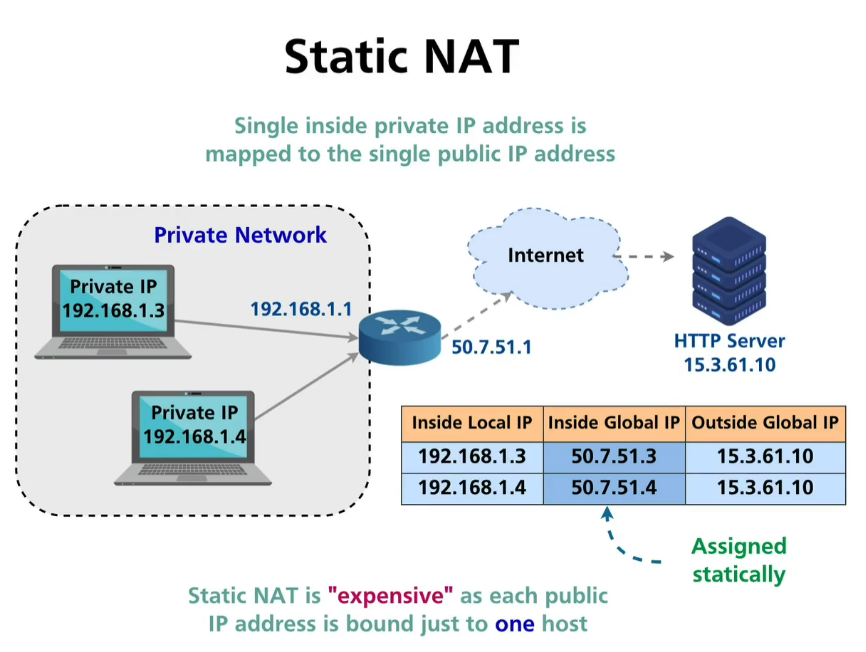

## Dynamic NAT (Lecture 162 of Bogdan)

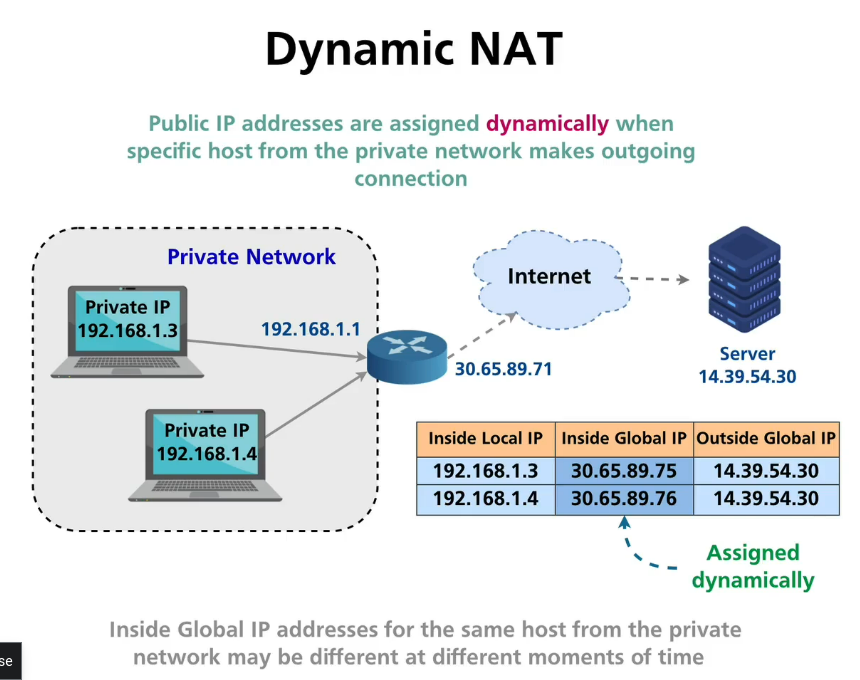

Just like in Static NAT, the Dynamic NAT utilizes one to one mapping between the private host address and the public host address. When any of the hosts in the private network connects to internet, the router than assigns dynamically a NAT entry, where Inside Global IP address is chosen from the IP block (30.65.89.0/24) belonging to the WAN interface.

After specific amount of time the router may remove the NAT Table Entry when the connection is no longer used.
The Inside Global IP that was used in the removed NAT entry would be returned to the pool of unused Inside Global IPs.

Just like in Static NAT, dynamic NAT also is wasteful when it comes to utilization of public IP addresses.

## Dynamic Port Address Translation (Dynamic PAT)

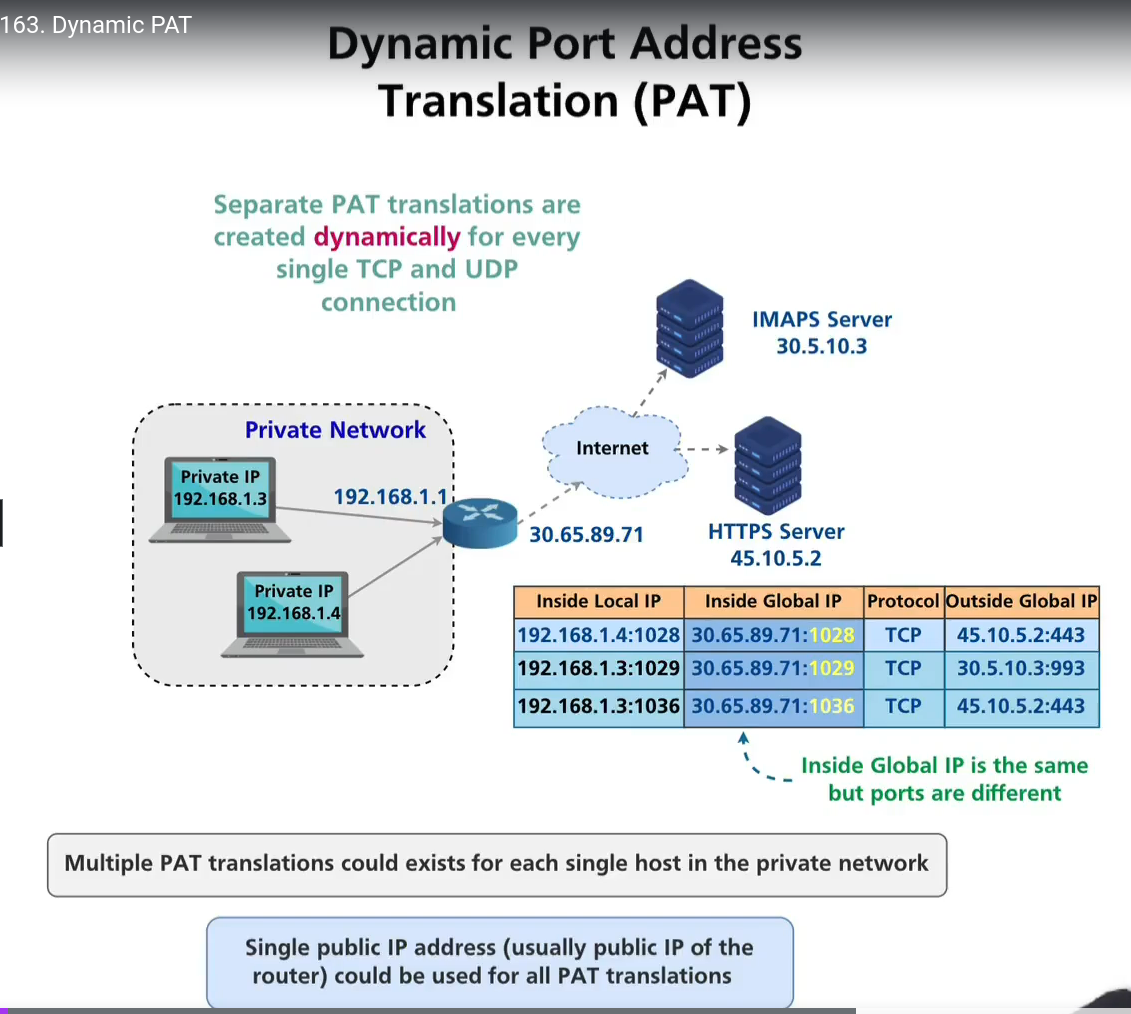

## Static PAT : Port Forwarding (Lecture 164 of Bogdan)

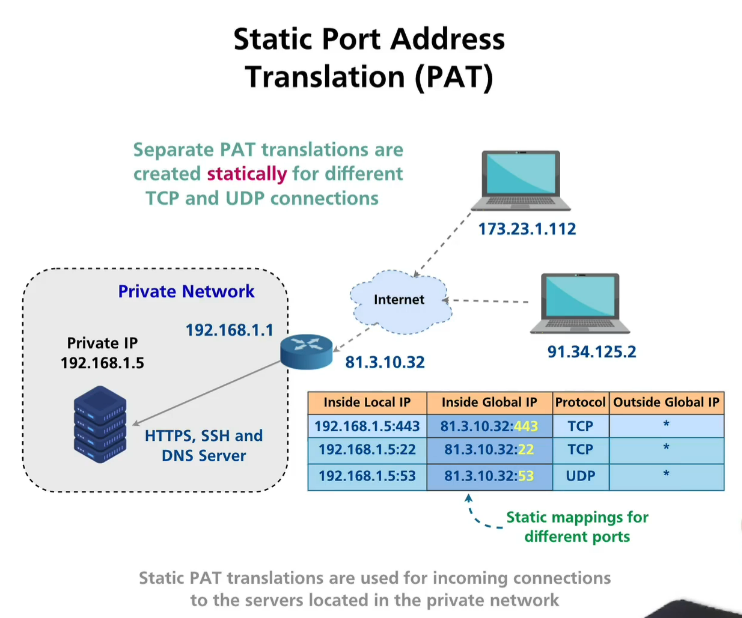

We have just described Dynamic PAT,which is a many-to-one type of translation.
Many local private IP addresses are translated to one single public IP address.
Also, dynamic PAT translations are utilized for outgoing (and incoming) connections.

In Dynamic PAT, If there is no matching PAT translations in the PAT table, the router will simply
drop the incoming packets from remote hosts. But what if you have a server running
in the private network as shown in the above picture? If we want to allow remote access
to this server; We could utilize one-to-one static NAT, which is a waste of public IP address.
Instead, you could utilize Static PAT.

Recap that HTTPS port 443, SSH port 22, DNS port 53. HTTP & SSH utilizes TCP and
DNS utilizes UDP.

In Static PAT, referring to the figure, we utilize the default gateway's WAN interface's
IP address 81.3.10.32 accross all the PAT entries; Inside Global IP has 81.3.10.32 for all the table 
entries.

In static PAT (i.e. port forwarding), the inside & local port numbers are the same & paired.
For example, fixed port 443 is used for incoming HTTPS connections. The fact that
a certain port (e.g. 443) is used for a certain service (e.g. HTTPS) makes PAT static.
Static PAT entries are configured manually to the router.

For outgoing connections, we need to use dynamic PAT table as shown in the figure.

At the router, we can utilize access list at the inside global interface to block any other
connection other that 443, 22 or 53 to incoming server as an extra layer of security.



## REFERENCES